In [ ]:
# Code based on termpaper 2019 by Ashesh and Anders Høst

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# load data
df_insertion = pd.read_pickle(r"..\data\benchmark_results_insertion.pkl")
df_bubble = pd.read_pickle(r"..\data\bubble_sort_n8.pkl")
df_merge = pd.read_pickle(r"..\data\benchmark_results_mergesort.pkl")
df_quick = pd.read_pickle(r"..\data\quick_sort_n2.pkl")
df_combined = pd.read_pickle(r"..\data\benchmark_results_combined_n100.pkl")



In [25]:
df_quick

,input order,input size,run number,sorting algorithm,time
0,sorted,1,1,quick_sort,4.576398e-07
1,sorted,1,2,quick_sort,4.151682e-07
2,sorted,1,3,quick_sort,4.179296e-07
3,sorted,1,4,quick_sort,4.429298e-07
4,sorted,1,5,quick_sort,4.191188e-07
5,sorted,2,1,quick_sort,1.358926e-06
6,sorted,2,2,quick_sort,1.248169e-06
7,sorted,2,3,quick_sort,2.012506e-06
8,sorted,2,4,quick_sort,1.702215e-06
9,sorted,2,5,quick_sort,1.309431e-06


In [8]:
sns.set(rc={"figure.figsize":(84/25.4,84/25.4)})
sns.set_style("whitegrid")

In [9]:
sns.set(style="whitegrid", rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
color = sns.color_palette("Set2", 6)

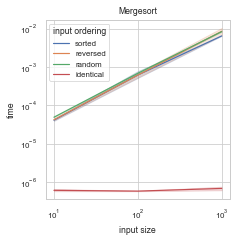

In [16]:
fig_merge = sns.lineplot(x="input size", y="time", data=df_merge, 
                         hue="input ordering")
plt.xscale("log")
plt.yscale("log")
plt.title('Mergesort')
fig_merge = fig_merge.get_figure()
#fig_merge.savefig("Mergesort.pdf")

In [17]:
# Concatenate

frames = [df_merge, df_combined, df_insertion]
df_all = pd.concat(frames, axis=0)

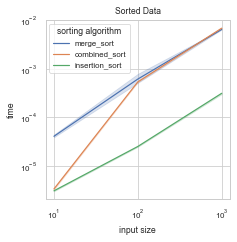

In [63]:
# Plot sorted

df_all_sorted = df_all[df_all["input ordering"] == "sorted"]
fig_sorted = sns.lineplot(x="input size", y='time', hue="sorting algorithm",
                         data=df_all_sorted)
plt.title("Sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_sorted = fig_sorted.get_figure()
fig_sorted.savefig("sorted_plot1000.pdf")

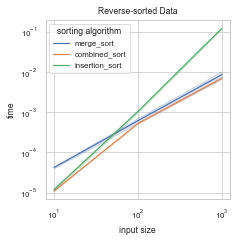

In [64]:
# Plot reversed

df_all_reversed = df_all[df_all["input ordering"] == "reversed"]
fig_reversed = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_reversed)
plt.title("Reverse-sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_reversed = fig_reversed.get_figure()
fig_reversed.savefig("reversed_plot1000.pdf")

PermissionError: [Errno 13] Permission denied: 'random_plot1000.pdf'

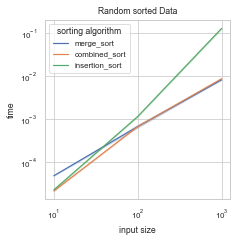

In [68]:
# Plot random

df_all_random = df_all[df_all["input ordering"] == "random"]
fig_random = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_random)
plt.title("Random sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_random = fig_random.get_figure()
fig_random.savefig("random_plot1000.pdf")